<a href="https://colab.research.google.com/github/vanquoc12/btvntuan5-20146406/blob/main/BTVNtuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=57afa16abf6a5da87b01e65307870f12d5e9b2d373342b50e3b62efd046ebcda
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


199.7088506910331


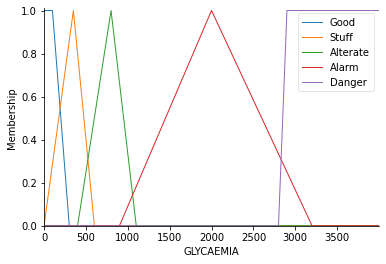

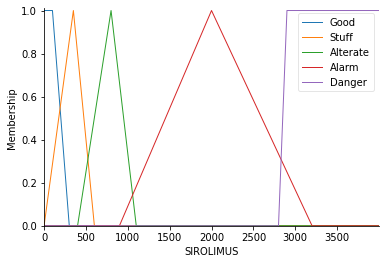

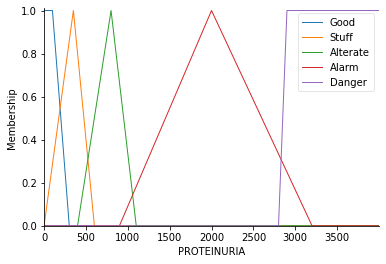

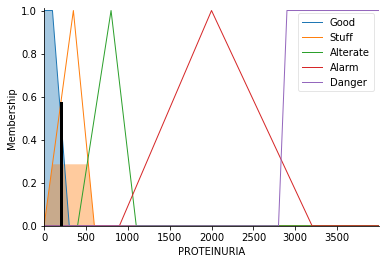

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
glycaemia=ctrl.Antecedent(np.arange(0,4000,1),'GLYCAEMIA')
sirolimus=ctrl.Antecedent(np.arange(0,4000,1),'SIROLIMUS')
proteinuria=ctrl.Consequent(np.arange(0,4000,1),'PROTEINURIA')

glycaemia['Good']=fuzz.trapmf(glycaemia.universe,[-2,0,100,300])
glycaemia['Stuff']=fuzz.trimf(glycaemia.universe,[0,350,600])
glycaemia['Alterate']=fuzz.trimf(glycaemia.universe,[400,800,1100])
glycaemia['Alarm']=fuzz.trimf(glycaemia.universe,[900,2000,3200])
glycaemia['Danger']=fuzz.trapmf(glycaemia.universe,[2800,2900,4500,4500])

sirolimus['Good']=fuzz.trapmf(sirolimus.universe,[-2,0,100,300])
sirolimus['Stuff']=fuzz.trimf(sirolimus.universe,[0,350,600])
sirolimus['Alterate']=fuzz.trimf(sirolimus.universe,[400,800,1100])
sirolimus['Alarm']=fuzz.trimf(sirolimus.universe,[900,2000,3200])
sirolimus['Danger']=fuzz.trapmf(sirolimus.universe,[2800,2900,4500,4500])

proteinuria['Good']=fuzz.trapmf(proteinuria.universe,[-2,0,100,300])
proteinuria['Stuff']=fuzz.trimf(proteinuria.universe,[0,350,600])
proteinuria['Alterate']=fuzz.trimf(proteinuria.universe,[400,800,1100])
proteinuria['Alarm']=fuzz.trimf(proteinuria.universe,[900,2000,3200])
proteinuria['Danger']=fuzz.trapmf(proteinuria.universe,[2800,2900,4500,4500])
glycaemia.view()
sirolimus.view()
proteinuria.view() 

rule1=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule2=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule3=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule4=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule5=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

rule6=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule7=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule8=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule9=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule10=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

rule11=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule12=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule13=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule14=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule15=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['GLYCAEMIA']=100
tipping.input['SIROLIMUS']=100
tipping.compute()
print(tipping.output['PROTEINURIA'])
proteinuria.view(sim=tipping)

1.0642416777189911


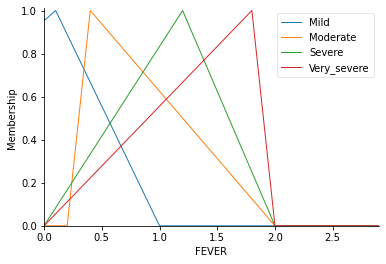

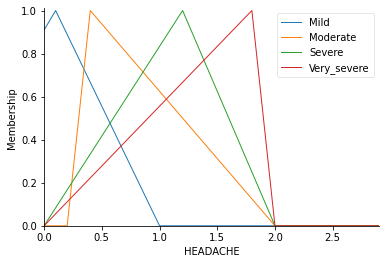

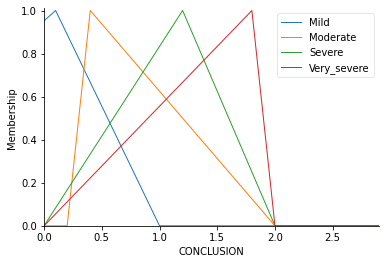

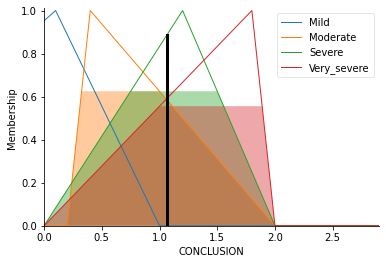

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
fever=ctrl.Antecedent(np.arange(0,3,0.1),'FEVER')
headache=ctrl.Antecedent(np.arange(0,3,0.1),'HEADACHE')
conclusion=ctrl.Consequent(np.arange(0,3,0.1),'CONCLUSION')
fever['Mild']=fuzz.trapmf(fever.universe,[-2,0.1,0.1,1])
fever['Moderate']=fuzz.trimf(fever.universe,[0.2,0.4,2])
fever['Severe']=fuzz.trimf(fever.universe,[0,1.2,2])
fever['Very_severe']=fuzz.trimf(fever.universe,[0,1.8,2])
headache['Mild']=fuzz.trapmf(headache.universe,[-1,0.1,0.1,1])
headache['Moderate']=fuzz.trimf(headache.universe,[0.2,0.4,2])
headache['Severe']=fuzz.trimf(headache.universe,[0,1.2,2])
headache['Very_severe']=fuzz.trimf(headache.universe,[0,1.8,2])
conclusion['Mild']=fuzz.trapmf(conclusion.universe,[-2,0.1,0.1,1])
conclusion['Moderate']=fuzz.trimf(conclusion.universe,[0.2,0.4,2])
conclusion['Severe']=fuzz.trimf(conclusion.universe,[0,1.2,2])
conclusion['Very_severe']=fuzz.trimf(conclusion.universe,[0,1.8,2])
fever.view()
headache.view()
conclusion.view()
rule1=ctrl.Rule(fever['Mild']&headache['Mild'],conclusion['Mild'])
rule2=ctrl.Rule(fever['Moderate']&headache['Mild'],conclusion['Moderate'])
rule3=ctrl.Rule(fever['Severe']&headache['Mild'],conclusion['Severe'])
rule4=ctrl.Rule(fever['Very_severe']&headache['Mild'],conclusion['Moderate'])

rule5=ctrl.Rule(fever['Mild']&headache['Moderate'],conclusion['Mild'])
rule6=ctrl.Rule(fever['Moderate']&headache['Moderate'],conclusion['Moderate'])
rule7=ctrl.Rule(fever['Severe']&headache['Moderate'],conclusion['Severe'])
rule8=ctrl.Rule(fever['Very_severe']&headache['Moderate'],conclusion['Severe'])

rule9=ctrl.Rule(fever['Mild']&headache['Very_severe'],conclusion['Mild'])
rule10=ctrl.Rule(fever['Moderate']&headache['Very_severe'],conclusion['Moderate'])
rule11=ctrl.Rule(fever['Severe']&headache['Very_severe'],conclusion['Severe'])
rule12=ctrl.Rule(fever['Very_severe']&headache['Very_severe'],conclusion['Very_severe'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['FEVER']=1
tipping.input['HEADACHE']=1
tipping.compute()
print(tipping.output['CONCLUSION'])
conclusion.view(sim=tipping)

1.611111111111111


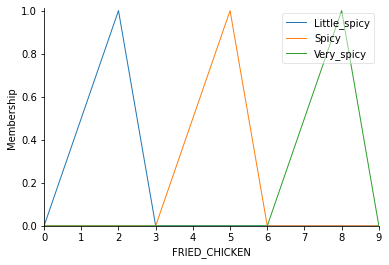

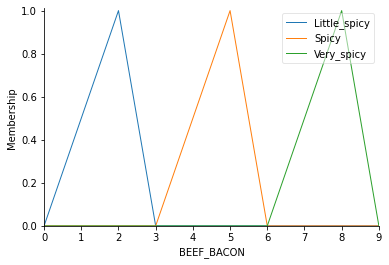

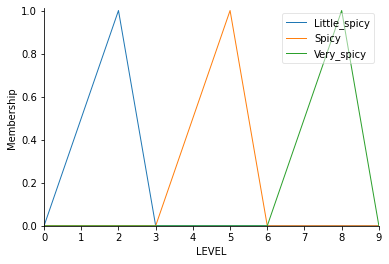

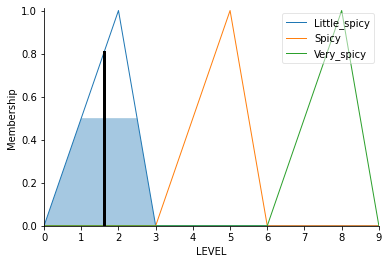

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
Fried_chicken=ctrl.Antecedent(np.arange(0,10,1),'FRIED_CHICKEN')
Beef_Bacon=ctrl.Antecedent(np.arange(0,10,1),'BEEF_BACON')
Level=ctrl.Consequent(np.arange(0,10,1),'LEVEL')

Fried_chicken['Little_spicy']=fuzz.trimf(Fried_chicken.universe,[0,2,3])
Fried_chicken['Spicy']=fuzz.trimf(Fried_chicken.universe,[3,5,6])
Fried_chicken['Very_spicy']=fuzz.trimf(Fried_chicken.universe,[6,8,9])

Beef_Bacon['Little_spicy']=fuzz.trimf(Beef_Bacon.universe,[0,2,3])
Beef_Bacon['Spicy']=fuzz.trimf(Beef_Bacon.universe,[3,5,6])
Beef_Bacon['Very_spicy']=fuzz.trimf(Beef_Bacon.universe,[6,8,9])

Level['Little_spicy']=fuzz.trimf(Level.universe,[0,2,3])
Level['Spicy']=fuzz.trimf(Level.universe,[3,5,6])
Level['Very_spicy']=fuzz.trimf(Level.universe,[6,8,9])
Fried_chicken.view()
Beef_Bacon.view()
Level.view()
rule1=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Little_spicy'],Level['Little_spicy'])
rule2=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Little_spicy'],Level['Spicy'])
rule3=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Little_spicy'],Level['Very_spicy'])

rule4=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Spicy'],Level['Little_spicy'])
rule5=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Spicy'],Level['Spicy'])
rule6=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Spicy'],Level['Very_spicy'])

rule7=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Little_spicy'],Level['Little_spicy'])
rule8=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Little_spicy'],Level['Spicy'])
rule9=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Little_spicy'],Level['Very_spicy'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['FRIED_CHICKEN']=1
tipping.input['BEEF_BACON']=1
tipping.compute()
print(tipping.output['LEVEL'])
Level.view(sim=tipping)

1.611111111111111


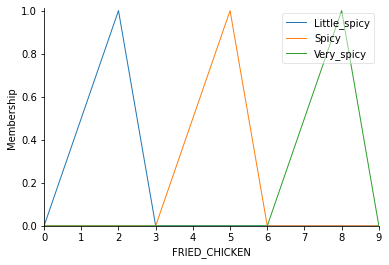

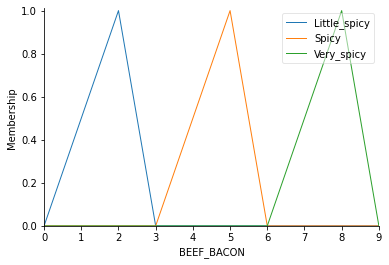

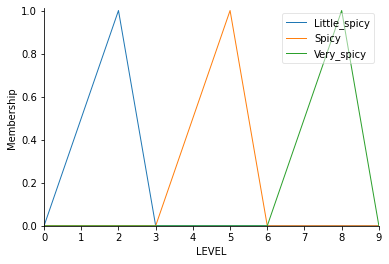

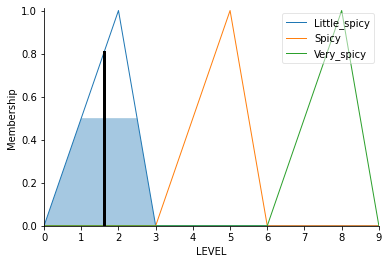

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
Fried_chicken=ctrl.Antecedent(np.arange(0,10,1),'FRIED_CHICKEN')
Beef_Bacon=ctrl.Antecedent(np.arange(0,10,1),'BEEF_BACON')
Level=ctrl.Consequent(np.arange(0,10,1),'LEVEL')

Fried_chicken['Little_spicy']=fuzz.trimf(Fried_chicken.universe,[0,2,3])
Fried_chicken['Spicy']=fuzz.trimf(Fried_chicken.universe,[3,5,6])
Fried_chicken['Very_spicy']=fuzz.trimf(Fried_chicken.universe,[6,8,9])

Beef_Bacon['Little_spicy']=fuzz.trimf(Beef_Bacon.universe,[0,2,3])
Beef_Bacon['Spicy']=fuzz.trimf(Beef_Bacon.universe,[3,5,6])
Beef_Bacon['Very_spicy']=fuzz.trimf(Beef_Bacon.universe,[6,8,9])

Level['Little_spicy']=fuzz.trimf(Level.universe,[0,2,3])
Level['Spicy']=fuzz.trimf(Level.universe,[3,5,6])
Level['Very_spicy']=fuzz.trimf(Level.universe,[6,8,9])
Fried_chicken.view()
Beef_Bacon.view()
Level.view()
rule1=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Little_spicy'],Level['Little_spicy'])
rule2=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Little_spicy'],Level['Spicy'])
rule3=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Little_spicy'],Level['Very_spicy'])

rule4=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Spicy'],Level['Little_spicy'])
rule5=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Spicy'],Level['Spicy'])
rule6=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Spicy'],Level['Very_spicy'])

rule7=ctrl.Rule(Fried_chicken['Little_spicy']&Beef_Bacon['Little_spicy'],Level['Little_spicy'])
rule8=ctrl.Rule(Fried_chicken['Spicy']&Beef_Bacon['Little_spicy'],Level['Spicy'])
rule9=ctrl.Rule(Fried_chicken['Very_spicy']&Beef_Bacon['Little_spicy'],Level['Very_spicy'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['FRIED_CHICKEN']=1
tipping.input['BEEF_BACON']=1
tipping.compute()
print(tipping.output['LEVEL'])
Level.view(sim=tipping)